# ***Upload and Load Dataset***

In [ ]:
#Upload file in colab
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
#Load the dataset
import pandas as pd
df = pd.read_excel('Dataset.xlsx')

# ***Data Cleaning***

In [ ]:
#Display Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB
None


In [ ]:
#Display summary statistics of raw dataset
df.describe()

,Quantity,Date,Price,CustomerID
count,522064.000000,522064,522064.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.931710
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.110525,NaN,41.900599,1721.846964


In [ ]:
#Identify missing values
print(df.isnull().sum())

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
#Drop unnecessary columns
df = df.drop('CustomerID', axis=1)

In [ ]:
#Remove missing values from column 'Itemname'
df = df.dropna(subset=['Itemname'])

In [ ]:
#Display number of rows and columns
print(df.shape)

(520609, 6)


In [ ]:
#Display the duplicated rows from the dataset
print(df[df.duplicated()])

        BillNo                           Itemname  Quantity  \
508     536409        UNION JACK FLAG LUGGAGE TAG         1   
518     536409      HAND WARMER SCOTTY DOG DESIGN         1   
528     536409     SET 2 TEA TOWELS I LOVE LONDON         1   
530     536409       SCOTTIE DOG HOT WATER BOTTLE         1   
546     536412  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...        ...                                ...       ...   
521833  581538        BLACK PIRATE TREASURE CHEST         1   
521847  581538     BOX OF 6 MINI VINTAGE CRACKERS         1   
521850  581538              REVOLVER WOODEN RULER         1   
521857  581538                        WICKER STAR         1   
521859  581538        JUMBO BAG VINTAGE CHRISTMAS         1   

                      Date  Price         Country  
508    2010-12-01 11:45:00   1.25  United Kingdom  
518    2010-12-01 11:45:00   2.10  United Kingdom  
528    2010-12-01 11:45:00   2.95  United Kingdom  
530    2010-12-01 11:45:00   4.95  

In [ ]:
#Change Datatype
df['Date']= pd.to_datetime(df['Date'],format="%d.%m.%Y %H:%M")

In [ ]:
#Display rows where 'Price' is <= 0
print(df[df['Price'] <= 0])

        BillNo                      Itemname  Quantity                Date  \
6275    536941                        amazon        20 2010-12-03 12:08:00   
6276    536942                        amazon        15 2010-12-03 12:08:00   
7122    537032                             ?       -30 2010-12-03 16:50:00   
9097    537197  ROUND CAKE TIN VINTAGE GREEN         1 2010-12-05 14:02:00   
12926   537425                         check       -20 2010-12-06 15:35:00   
...        ...                           ...       ...                 ...   
515637  581213                         check       -30 2011-12-07 18:38:00   
517209  581226                       missing      -338 2011-12-08 09:56:00   
518770  581406  POLYESTER FILLER PAD 45x45cm       240 2011-12-08 13:58:00   
518771  581406  POLYESTER FILLER PAD 40x40cm       300 2011-12-08 13:58:00   
519172  581422                       smashed      -235 2011-12-08 15:24:00   

        Price         Country  
6275      0.0  United Kingdom  

In [ ]:
#Remove rows where 'Price' is <=0
df = df.drop(df[df['Price'] <= 0].index)

In [ ]:
#Final cleaned dataset
df.shape

(519551, 6)

# ***Exploratory Data Analysis***

In [ ]:
#Creation of new column
df['Total_Price'] = df['Quantity'] * df['Price']

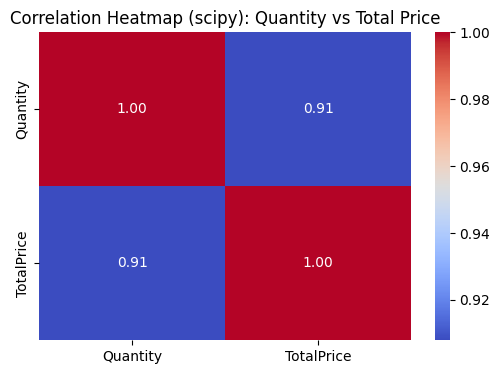

Pearson correlation: 0.9079156102408894
P-value: 0.0


In [ ]:
#Display if there is a correlation between 'Quantity' and 'Total_Price' in heatmap
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pearson_corr, p_value = stats.pearsonr(df['Quantity'], df['Total_Price'])

corr_df = pd.DataFrame(
    [[1, pearson_corr],
     [pearson_corr, 1]],
    index=['Quantity', 'TotalPrice'],
    columns=['Quantity', 'TotalPrice']
)

plt.figure(figsize=(6,4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (scipy): Quantity vs Total Price")
plt.show()

print("Pearson correlation:", pearson_corr)
print("P-value:", p_value)

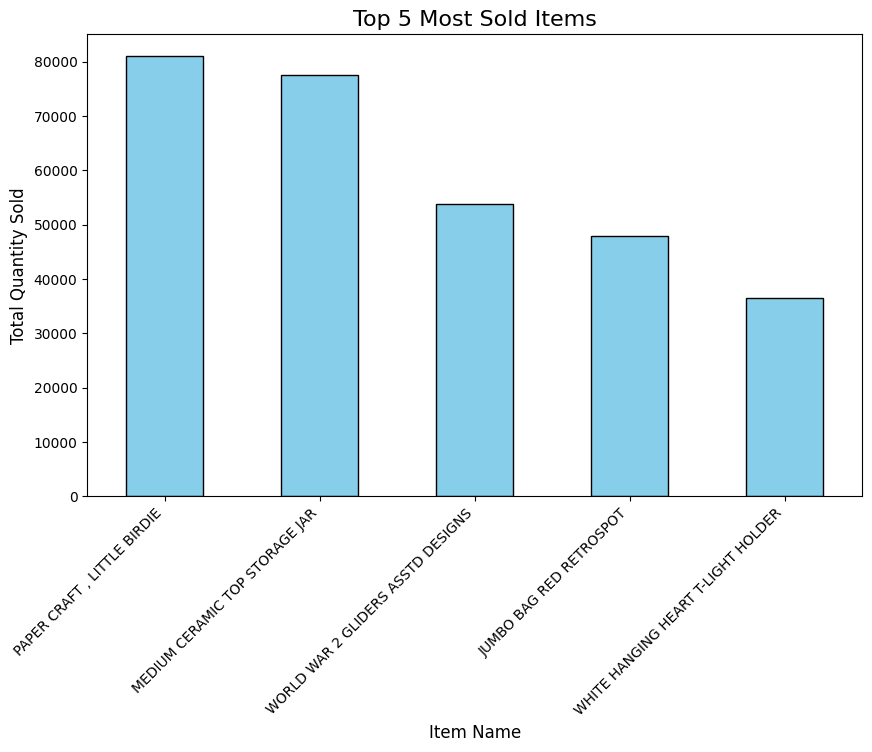

In [ ]:
# Find top 5 most sold items with bar chart
import matplotlib.pyplot as plt

top_items = df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
top_items.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 5 Most Sold Items", fontsize=16)
plt.xlabel("Item Name", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

he item “Paper Craft, Little Birdie” leads with the highest sales volume, followed closely by the “Medium Ceramic Top Storage Jar.” Both products significantly outperform others, suggesting strong consumer preference for creative or household-themed items. “World War 2 Gliders Assorted Designs”, “Jumbo Bag Red Retrospot”, and “White Hanging Heart T-Light Holder” round out the top five, showing popularity across both decorative and practical categories.

Overall, this visualization indicates that giftware and home décor items dominate sales, implying customer interest in affordable, visually appealing products. Businesses can leverage these insights to prioritize stock replenishment, design product bundles, and develop targeted marketing campaigns around these high-performing items.

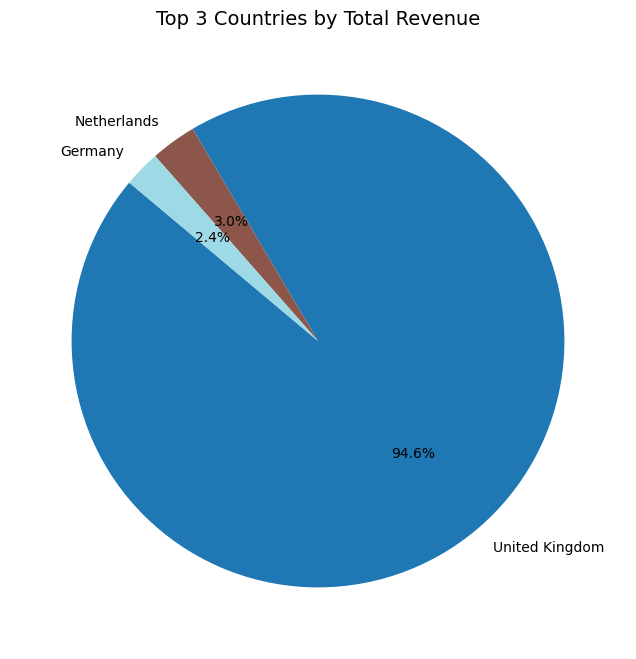

In [ ]:
#Display revenue contributions from top 3 countries with Pie chart
import matplotlib.pyplot as plt

country_revenue = df.groupby('Country')['Total_Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
country_revenue.head(3).plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    cmap="tab20",
    ylabel=''
)

plt.title("Top 3 Countries by Total Revenue", fontsize=14)
plt.show()

The United Kingdom overwhelmingly dominates with 94.6% of total revenue, indicating it is the company’s primary market. The Netherlands (3.0%) and Germany (2.4%) represent much smaller revenue shares, suggesting limited international penetration.

This pattern reveals a high dependency on domestic sales, implying potential risk if market conditions in the UK fluctuate. It also signals significant growth opportunities in international markets, where focused marketing, partnerships, and localized strategies could diversify the revenue base and enhance global stability.

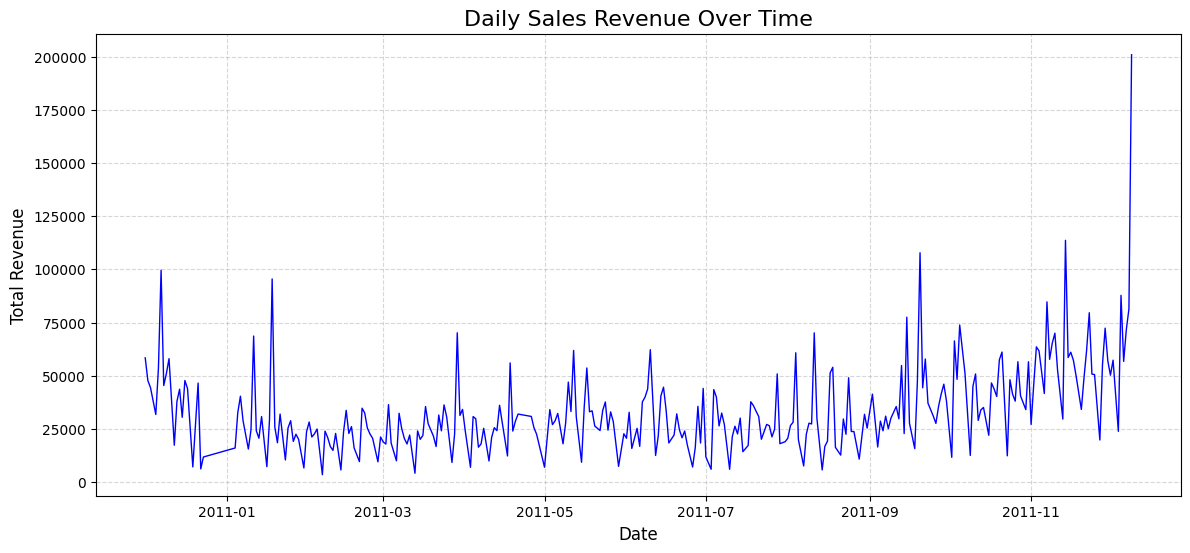

In [ ]:
#Display daily revenue trend with line chart
import matplotlib.pyplot as plt
daily_sales = df.groupby(df['Date'].dt.date)['Total_Price'].sum()

plt.figure(figsize=(14,6))
plt.plot(daily_sales.index, daily_sales.values, color='blue', linewidth=1)

plt.title("Daily Sales Revenue Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The series shows noticeable short-term fluctuations—spikes followed by dips—typical of daily retail activity. However, an overall upward trend emerges toward the end of the year, with revenues climbing significantly from September onward and peaking in late November and December. This aligns with holiday-season sales and increased consumer spending during festive periods.

The frequent peaks throughout the timeline suggest periodic promotional events or bulk orders, while the strong year-end surge indicates seasonal demand concentration. This trend underscores the importance of strategic resource allocation—such as inventory buildup, staffing, and marketing—during high-revenue months to maximise profitability.

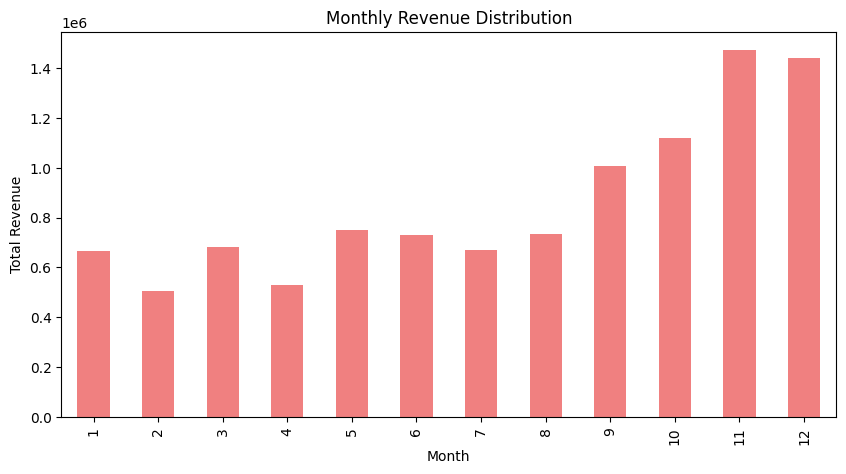

In [ ]:
#Display product sales by Month
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total_Price'].sum()
monthly_sales.plot(kind='bar', color='lightcoral', figsize=(10,5))
plt.title("Monthly Revenue Distribution")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

Revenue remains relatively steady from January to August, fluctuating between 0.5 and 0.8 million. However, a sharp increase begins in September, peaking in November and December, where revenue exceeds 1.4 million. This pattern likely reflects holiday-related shopping behaviour, driven by seasonal promotions, gift purchases, and increased consumer spending during the festive period.

Overall, the chart highlights that Q4 (October–December) contributes the highest share of annual revenue, suggesting that businesses should prioritise marketing campaigns, inventory restocking, and staffing efforts during this period to capitalise on peak demand.

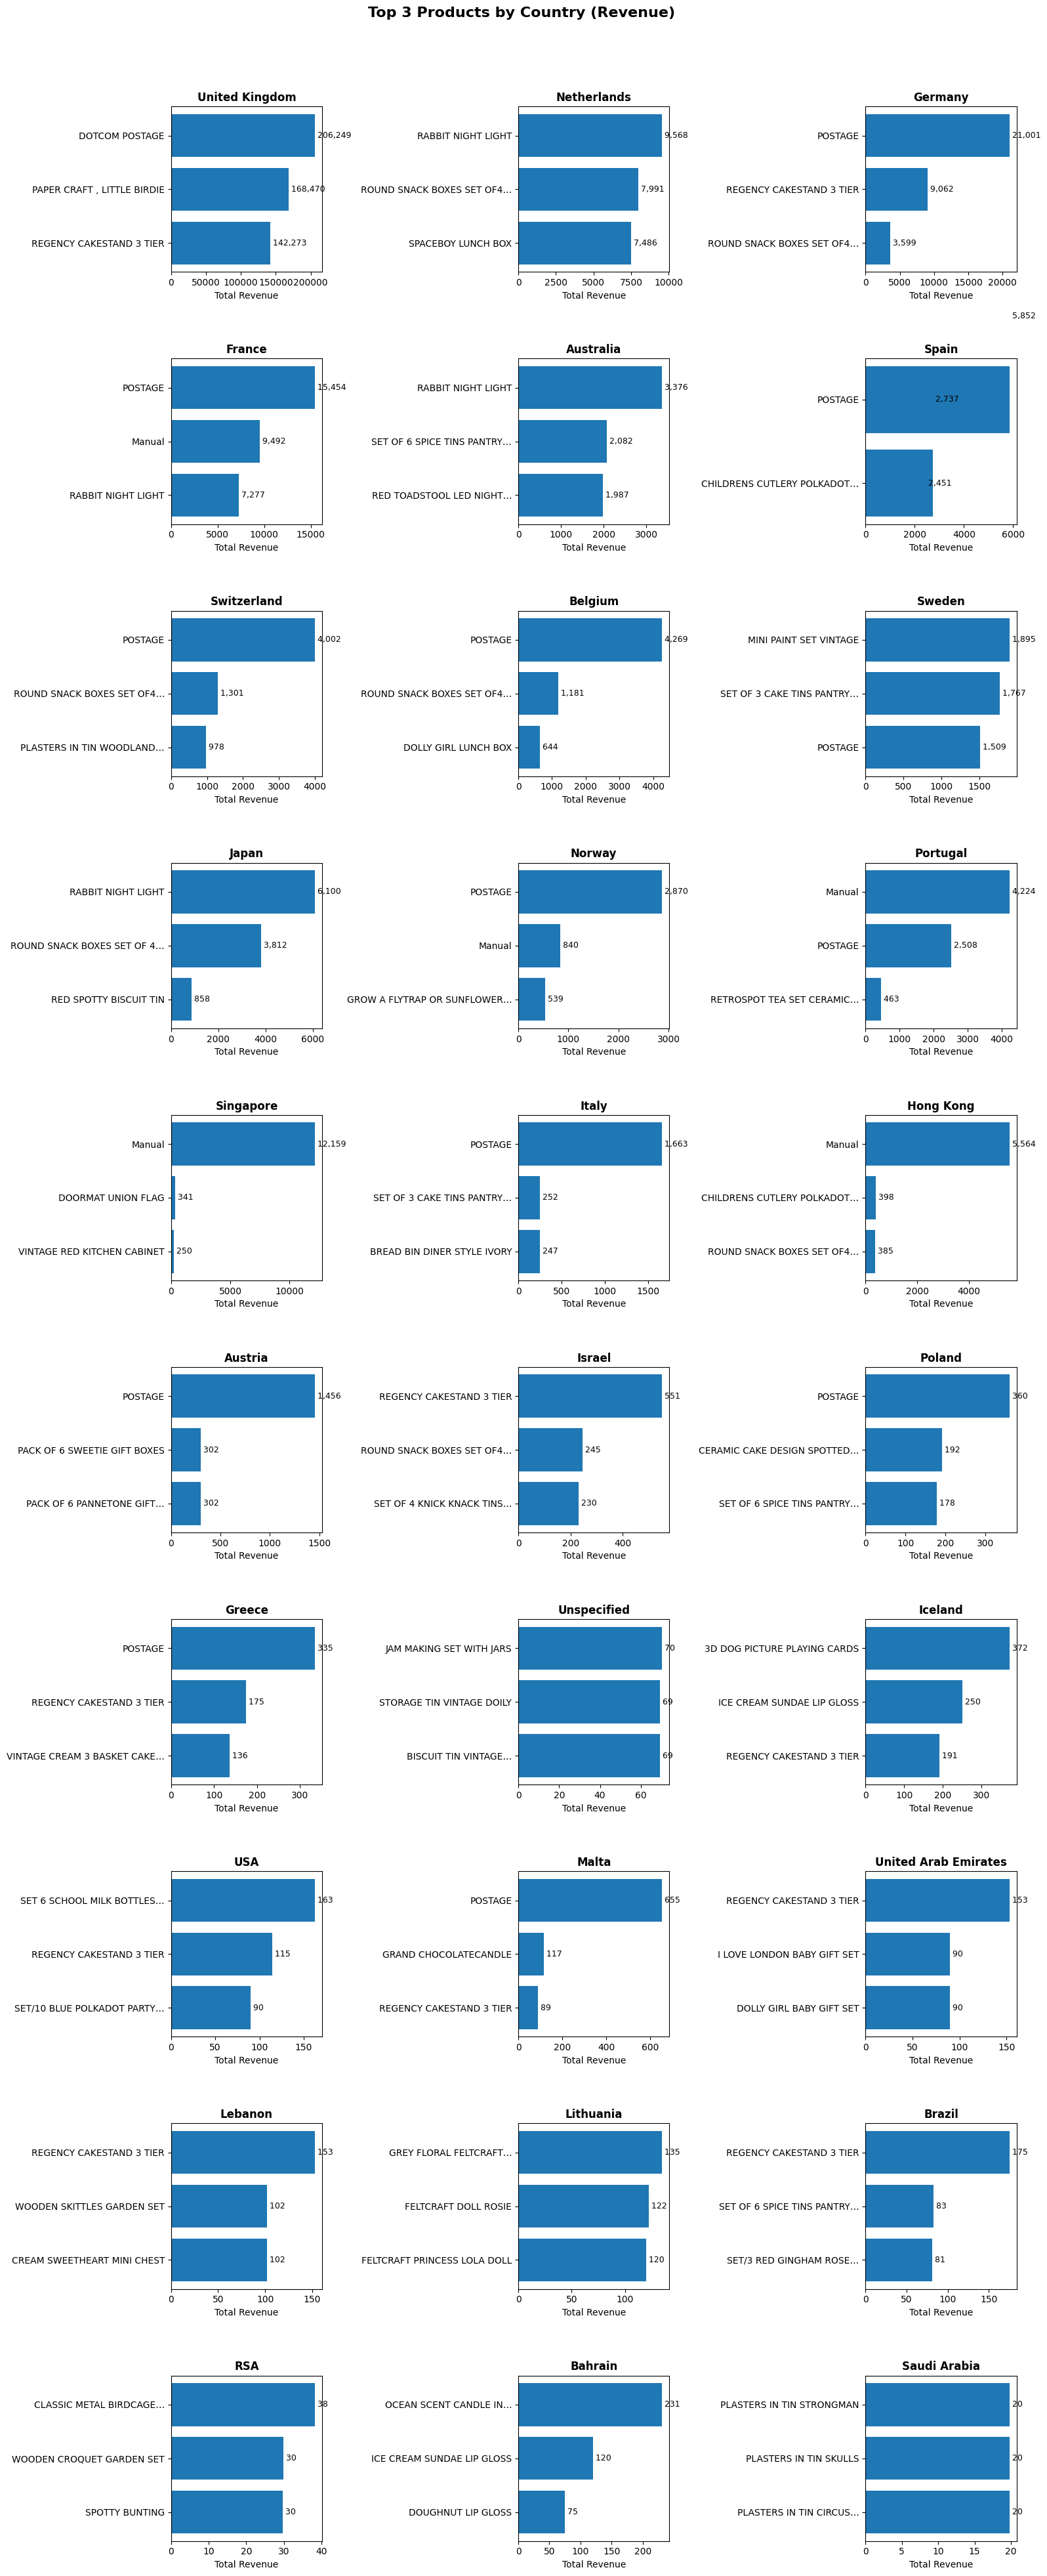

In [ ]:
#Display Top categories by Country
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import shorten

top_country_items = (
    df.groupby(['Country', 'Itemname'], as_index=False)['Total_Price']
      .sum()
      .sort_values(['Country', 'Total_Price'], ascending=[True, False])
      .groupby('Country')
      .head(3)
)

N = 30
top_countries = (df.groupby('Country')['Total_Price']
                   .sum()
                   .sort_values(ascending=False)
                   .head(N)
                   .index.tolist())

plot_df = top_country_items[top_country_items['Country'].isin(top_countries)].copy()

plot_df['Item_short'] = plot_df['Itemname'].apply(lambda s: shorten(str(s), width=28, placeholder='…'))

plot_df['Country'] = pd.Categorical(plot_df['Country'], categories=top_countries, ordered=True)
plot_df = plot_df.sort_values(['Country', 'Total_Price'], ascending=[True, False])

cols = 3
rows = int(np.ceil(len(top_countries) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows), sharex=False)
axes = np.atleast_2d(axes)

for i, country in enumerate(top_countries):
    r, c = divmod(i, cols)
    ax = axes[r, c]
    data = plot_df[plot_df['Country'] == country].sort_values('Total_Price')

    ax.barh(data['Item_short'], data['Total_Price'])
    ax.set_title(f"{country}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Total Revenue")
    ax.set_ylabel("")

    for val, y in zip(data['Total_Price'], range(len(data))):
        ax.text(val, y, f" {val:,.0f}", va='center', ha='left', fontsize=9)

total_axes = rows*cols
for j in range(len(top_countries), total_axes):
    r, c = divmod(j, cols)
    fig.delaxes(axes[r, c])

fig.suptitle("Top 3 Products by Country (Revenue)", fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

From the chart, the United Kingdom dominates total revenue with items such as Dotcom Postage, Paper Craft – Little Birdie, and Regency Cake Stand, reflecting a high domestic customer base. Other countries display clear local preferences—for example, the Rabbit Night Light appears repeatedly among top sellers in the Netherlands, Australia, and Japan, indicating a globally appealing product. Meanwhile, Postage consistently ranks within the top categories across multiple European nations (e.g., Germany, France, Spain), highlighting its strong baseline demand across regions.

Overall, this chart demonstrates how consumer preferences vary geographically, suggesting the need for localized marketing and inventory strategies. High-performing items can guide international promotional campaigns, while lower-revenue markets may benefit from targeted product diversification or pricing optimization.

Average Basket Size: 26.01
Median Basket Size: 15
Most Common Basket Size: 1
Range: 1 to 1108


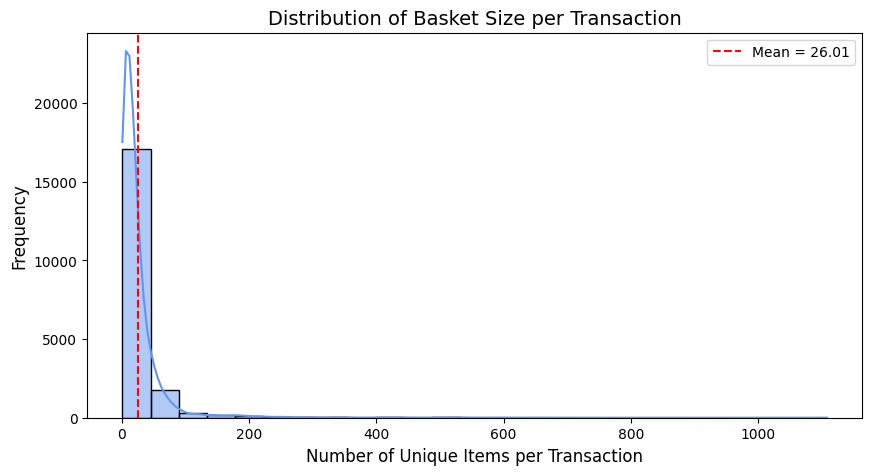

In [ ]:
#Display Average Basket Size per Transaction
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

basket_size = df.groupby('BillNo')['Itemname'].nunique()

print("Average Basket Size:", round(basket_size.mean(), 2))
print("Median Basket Size:", int(basket_size.median()))
print("Most Common Basket Size:", basket_size.mode()[0])
print("Range:", basket_size.min(), "to", basket_size.max())

plt.figure(figsize=(10,5))
sns.histplot(basket_size, bins=25, kde=True, color='cornflowerblue', edgecolor='black')
plt.title("Distribution of Basket Size per Transaction", fontsize=14)
plt.xlabel("Number of Unique Items per Transaction", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(basket_size.mean(), color='red', linestyle='--', label=f'Mean = {basket_size.mean():.2f}')
plt.legend()
plt.show()

The plot is right-skewed, meaning most transactions contained relatively few unique items, while a small number of baskets were extremely large. The red dashed line marks the mean basket size of approximately 26 items, showing that while the average basket contains around 26 products, the majority of purchases cluster well below this average.

This pattern suggests that most customers make small, routine purchases, while a minority engage in bulk buying or wholesale transactions. Understanding this helps in inventory management and customer segmentation—for example, designing separate marketing strategies for small-basket and bulk-basket shoppers.

In [ ]:
# Compare the average Total_Price per transaction between countries
from scipy import stats
import numpy as np

countries = df['Country'].unique()
countries = [c for c in countries if c != 'United Kingdom']

uk = df[df['Country'] == 'United Kingdom']['Total_Price']

results = []

for country in countries:
    sample = df[df['Country'] == country]['Total_Price']

    t_stat, p_val = stats.ttest_ind(uk, sample, equal_var=False, nan_policy='omit')

    results.append({
        'Country': country,
        't_statistic': round(t_stat, 4),
        'p_value': p_val
    })

import pandas as pd
t_test_results = pd.DataFrame(results).sort_values(by='p_value')
print(t_test_results.to_string(index=False))

             Country  t_statistic       p_value
         Netherlands     -30.1017 2.024073e-169
           Australia     -21.1186  2.030931e-84
         Unspecified      13.1265  2.920655e-37
             Germany     -12.2117  3.080709e-34
         Switzerland     -11.7049  5.322187e-31
              Sweden     -11.9846  5.960052e-29
              Norway     -10.8512  2.671127e-26
              France      -7.0200  2.327787e-12
           Lithuania      -7.1295  2.736755e-08
               Japan      -5.6192  4.171907e-08
               Italy      -5.2687  1.613314e-07
              Greece      -4.7338  5.072256e-06
              Israel      -4.4612  1.131048e-05
               Spain      -4.2132  2.594964e-05
             Lebanon      -4.3671  7.360650e-05
             Austria      -3.9508  9.067551e-05
              Poland      -3.8960  1.111257e-04
             Belgium      -3.1884  1.434554e-03
           Singapore      -3.1116  2.106362e-03
United Arab Emirates      -3.1361  2.509

In [ ]:
#ANNOVA Test
from scipy import stats

grouped = [group["Total_Price"].values for name, group in df.groupby("Country")]

f_stat, p_val = stats.f_oneway(*grouped)
print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 20.286694823583755
p-value: 1.9847002989486874e-105


In [ ]:
# Run Tukey HSD on all countries
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df['Total_Price'],
    groups=df['Country'],
    alpha=0.05
)

tukey_results = pd.DataFrame(
    data=tukey.summary().data[1:],
    columns=tukey.summary().data[0]
)

significant_pairs = tukey_results[tukey_results['reject'] == True]
print(significant_pairs.to_string(index=False))

     group1         group2  meandiff  p-adj     lower    upper  reject
  Australia        Austria  -91.5675 0.0000 -150.8124 -32.3225    True
  Australia        Belgium  -96.9085 0.0000 -134.3079 -59.5091    True
  Australia         France  -92.2470 0.0000 -124.0034 -60.4907    True
  Australia        Germany  -91.8751 0.0000 -123.4941 -60.2562    True
  Australia        Iceland  -93.5110 0.0059 -174.9131 -12.1089    True
  Australia         Israel  -89.6152 0.0002 -156.1491 -23.0812    True
  Australia          Italy  -94.1273 0.0000 -141.6971 -46.5576    True
  Australia         Norway  -83.4244 0.0000 -126.5515 -40.2973    True
  Australia         Poland  -94.9661 0.0000 -158.6139 -31.3183    True
  Australia       Portugal  -94.7092 0.0000 -134.4636 -54.9549    True
  Australia          Spain  -92.4028 0.0000 -128.5259 -56.2797    True
  Australia    Switzerland  -88.1537 0.0000 -125.7799 -50.5275    True
  Australia            USA  -97.1901 0.0033 -179.1813 -15.1990    True
  Aust

In [ ]:
#Chi-test
import pandas as pd
from scipy.stats import chi2_contingency

top10_items = df['Itemname'].value_counts().head(10).index
subset = df[df['Itemname'].isin(top10_items)]

contingency_table = pd.crosstab(subset['Country'], subset['Itemname'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Chi-Square Statistic: 841.7077310666564
Degrees of Freedom: 243
p-value: 5.162956281129305e-67


In [ ]:
#Compare the average Quantity per transaction between countries
countries = [c for c in df['Country'].unique() if c != 'United Kingdom']
uk_qty = df[df['Country'] == 'United Kingdom']['Quantity']

results_qty = []
for country in countries:
    sample = df[df['Country'] == country]['Quantity']
    t_stat, p_val = stats.ttest_ind(uk_qty, sample, equal_var=False, nan_policy='omit')
    results_qty.append({'Country': country, 't_statistic': round(t_stat, 4), 'p_value': p_val})

import pandas as pd
t_test_qty = pd.DataFrame(results_qty).sort_values(by='p_value')
print(t_test_qty.to_string(index=False))

             Country  t_statistic       p_value
         Netherlands     -32.8701 4.572217e-196
           Australia     -21.2958  1.386469e-85
         Switzerland     -12.4685  6.481385e-35
             Germany     -12.0428  2.322789e-33
              France     -11.3921  5.192684e-30
              Norway     -11.5785  1.331735e-29
              Sweden     -11.6176  1.774243e-27
           Singapore      -7.4321  2.138607e-12
               Japan      -7.0690  9.813580e-12
           Hong Kong      -6.9799  1.760437e-11
                 RSA       6.9936  4.122871e-10
              Israel      -5.6614  3.241175e-08
             Belgium      -4.8058  1.585531e-06
         Unspecified       4.6490  3.926572e-06
                 USA      -4.6326  6.412010e-06
           Lithuania      -5.2149  8.210664e-06
            Portugal      -3.1915  1.426771e-03
               Spain      -3.1869  1.449230e-03
United Arab Emirates      -3.1560  2.356514e-03
             Iceland      -2.7488  6.555

In [ ]:
#ANOVA Test
from scipy import stats

groups_qty = [group["Quantity"].values for name, group in df.groupby("Country")]

f_stat_qty, p_val_qty = stats.f_oneway(*groups_qty)
print("F-statistic:", f_stat_qty)
print("p-value:", p_val_qty)

F-statistic: 30.640016605099266
p-value: 3.979014792799383e-168


In [ ]:
#Run Tukey HSD on all countries
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

tukey_qty = pairwise_tukeyhsd(endog=df['Quantity'], groups=df['Country'], alpha=0.05)
tukey_qty_df = pd.DataFrame(data=tukey_qty.summary().data[1:], columns=tukey_qty.summary().data[0])
significant_qty = tukey_qty_df[tukey_qty_df['reject'] == True]
print(significant_qty.to_string(index=False))

     group1         group2  meandiff  p-adj     lower    upper  reject
  Australia        Austria  -58.7184 0.0000  -92.7984 -24.6384    True
  Australia        Belgium  -59.5411 0.0000  -81.0546 -38.0275    True
  Australia         France  -57.6478 0.0000  -75.9152 -39.3803    True
  Australia        Germany  -57.7896 0.0000  -75.9781 -39.6012    True
  Australia         Greece  -60.2443 0.0046 -111.9887  -8.4999    True
  Australia      Hong Kong  -54.1759 0.0001  -93.0374 -15.3144    True
  Australia        Iceland  -57.4767 0.0016 -104.3024 -10.6511    True
  Australia         Israel  -56.0365 0.0000  -94.3094 -17.7636    True
  Australia          Italy  -60.2804 0.0000  -87.6443 -32.9165    True
  Australia          Malta  -62.3215 0.0189 -120.4609  -4.1822    True
  Australia         Norway  -52.9281 0.0000  -77.7364 -28.1197    True
  Australia         Poland  -59.8186 0.0000  -96.4312 -23.2060    True
  Australia       Portugal  -60.1508 0.0000  -83.0190 -37.2826    True
  Aust

In [ ]:
#Chi-test
import pandas as pd
from scipy.stats import chi2_contingency

df['Quantity_Bin'] = pd.cut(df['Quantity'],
                            bins=[0, 2, 5, 10, 50, 1000],
                            labels=['1-2','3-5','6-10','11-50','51+'])

top10_items = df['Itemname'].value_counts().head(10).index
subset = df[df['Itemname'].isin(top10_items)]

contingency = pd.crosstab(subset['Quantity_Bin'], subset['Itemname'])

chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Chi-Square Statistic: 4761.422629568009
Degrees of Freedom: 36
p-value: 0.0


<Axes: xlabel='Weekday'>

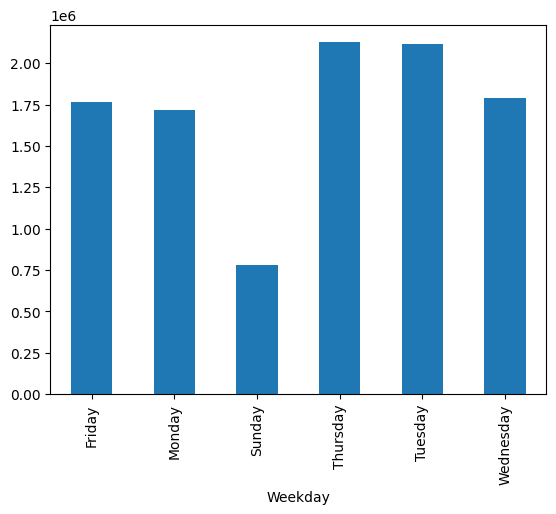

In [ ]:
#Weekly sales trend analysis
df['Weekday'] = df['Date'].dt.day_name()
df.groupby('Weekday')['Total_Price'].sum().plot(kind='bar')

From the visualization, Thursday and Tuesday record the highest transaction volumes—both exceeding 2 million—indicating peak shopping days. Friday and Wednesday follow with moderately high sales, while Sunday has the lowest transaction value, suggesting reduced weekend activity.

This pattern implies that customer engagement and spending are strongest in the mid-week period, which could guide promotion timing, staff allocation, or inventory planning for operational optimization.

In [ ]:
#Chi - test
import pandas as pd
from scipy.stats import chi2_contingency

df['Price_Bin'] = pd.cut(df['Total_Price'],
                         bins=[0, 5, 20, 50, 100, 500, 1000],
                         labels=['$0–5', '$5–20', '$20–50', '$50–100', '$100–500', '$500+'])

top10_items = df['Itemname'].value_counts().head(10).index
subset = df[df['Itemname'].isin(top10_items)]

contingency = pd.crosstab(subset['Itemname'], subset['Price_Bin'])

chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Chi-Square Statistic: 4987.327095693002
Degrees of Freedom: 45
p-value: 0.0


# ***Model Pre-processing***

In [ ]:
#Drop columns for modeling
df.drop(['Price', 'Month', 'Quantity_Bin', 'Weekday', 'Price_Bin'], axis=1, inplace=True)

In [ ]:
#Group items into transactions
transactions = df.groupby(['BillNo'])['Itemname'].apply(list)

In [ ]:
#Install mlxtend module
!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#Automated Parameter Optimisation
from mlxtend.frequent_patterns import fpgrowth, association_rules

supports = [0.01, 0.015, 0.02, 0.025, 0.03]
confidences = [0.5, 0.6, 0.7]
lifts = [1.0, 1.2, 1.5]

results = []

for s in supports:
    itemsets = fpgrowth(df_encoded, min_support=s, use_colnames=True)
    for c in confidences:
        rules = association_rules(itemsets, metric="confidence", min_threshold=c)
        rules = rules[rules["lift"] > 1.0]
        results.append({
            "support": s,
            "confidence": c,
            "rules_found": len(rules),
            "avg_lift": rules["lift"].mean() if len(rules) else 0
        })

import pandas as pd
tuning_df = pd.DataFrame(results)
print(tuning_df)

    support  confidence  rules_found   avg_lift
0     0.010         0.5          918  17.417441
1     0.010         0.6          552  19.837103
2     0.010         0.7          290  23.403827
3     0.015         0.5          186  12.681158
4     0.015         0.6           96  14.918990
5     0.015         0.7           40  17.309529
6     0.020         0.5           60  10.930536
7     0.020         0.6           29  11.900357
8     0.020         0.7           10  15.047453
9     0.025         0.5           36  11.862769
10    0.025         0.6           22  13.000692
11    0.025         0.7            9  15.874191
12    0.030         0.5           11  10.734675
13    0.030         0.6            8  12.399823
14    0.030         0.7            3  15.173177


# ***Model Implementation - Apriori Algorithm***

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#Implement Apriori Algorithm
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

In [ ]:
#Generate results
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

                                           antecedents  \
0                        (60 TEATIME FAIRY CAKE CASES)   
1                    (PACK OF 72 RETROSPOT CAKE CASES)   
2                          (ALARM CLOCK BAKELIKE PINK)   
3                         (ALARM CLOCK BAKELIKE GREEN)   
4                           (ALARM CLOCK BAKELIKE RED)   
..                                                 ...   
171  (JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)   
172  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)   
173                          (JUMBO BAG PINK POLKADOT)   
174                          (JUMBO BAG RED RETROSPOT)   
175                           (JUMBO STORAGE BAG SUKI)   

                                           consequents  antecedent support  \
0                    (PACK OF 72 RETROSPOT CAKE CASES)            0.040800   
1                        (60 TEATIME FAIRY CAKE CASES)            0.065392   
2                         (ALARM CLOCK BAKELIKE GREEN)            0.0

# ***Model Implementation - FP-Growth***

In [ ]:
#Implement FP-Growth
from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.02, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1.0)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(rules_fp)

                                           antecedents  \
0                           (JAM MAKING SET WITH JARS)   
1                             (JAM MAKING SET PRINTED)   
2                           (ALARM CLOCK BAKELIKE RED)   
3                         (ALARM CLOCK BAKELIKE GREEN)   
4                           (ALARM CLOCK BAKELIKE RED)   
5                          (ALARM CLOCK BAKELIKE PINK)   
6                          (ALARM CLOCK BAKELIKE PINK)   
7                         (ALARM CLOCK BAKELIKE GREEN)   
8                 (WHITE HANGING HEART T-LIGHT HOLDER)   
9                  (WOODEN PICTURE FRAME WHITE FINISH)   
10                 (WOODEN PICTURE FRAME WHITE FINISH)   
11                        (WOODEN FRAME ANTIQUE WHITE)   
12                (WHITE HANGING HEART T-LIGHT HOLDER)   
13                  (RED HANGING HEART T-LIGHT HOLDER)   
14                           (LUNCH BAG RED RETROSPOT)   
15                           (JUMBO BAG RED RETROSPOT)   
16            

# ***Tuning thresholds for business strategies***

In [ ]:
# Filter rules where confidence > 0.5 and lift > 1.2
filtered_rules = rules_fp[(rules_fp['confidence'] > 0.5) & (rules_fp['lift'] > 1.2)]
print(filtered_rules)

                                           antecedents  \
2                           (ALARM CLOCK BAKELIKE RED)   
3                         (ALARM CLOCK BAKELIKE GREEN)   
5                          (ALARM CLOCK BAKELIKE PINK)   
6                          (ALARM CLOCK BAKELIKE PINK)   
11                        (WOODEN FRAME ANTIQUE WHITE)   
13                  (RED HANGING HEART T-LIGHT HOLDER)   
16                           (JUMBO BAG PINK POLKADOT)   
20                            (JUMBO STORAGE BAG SUKI)   
22   (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...   
23   (JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)   
24   (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)   
33                    (JUMBO  BAG BAROQUE BLACK WHITE)   
36                    (JUMBO BAG PINK VINTAGE PAISLEY)   
42                       (60 TEATIME FAIRY CAKE CASES)   
45                          (STRAWBERRY CHARLOTTE BAG)   
47                          (STRAWBERRY CHARLOTTE BAG)   
48            

In [ ]:
# Filter rules where confidence > 0.7 and lift > 2
filtered_rules = rules_fp[(rules_fp['confidence'] > 0.7) & (rules_fp['lift'] > 2)]
print(filtered_rules)

                                           antecedents  \
23   (JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)   
106                  (ROSES REGENCY TEACUP AND SAUCER)   
107                  (GREEN REGENCY TEACUP AND SAUCER)   
125                      (CHARLOTTE BAG PINK POLKADOT)   
137                   (PINK REGENCY TEACUP AND SAUCER)   
139                   (PINK REGENCY TEACUP AND SAUCER)   
140  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...   
141  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
142  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
175                (GARDENERS KNEELING PAD CUP OF TEA)   

                            consequents  antecedent support  \
23            (JUMBO BAG RED RETROSPOT)            0.026279   
106   (GREEN REGENCY TEACUP AND SAUCER)            0.051741   
107   (ROSES REGENCY TEACUP AND SAUCER)            0.049747   
125       (RED RETROSPOT CHARLOTTE BAG)            0.037681   
137   (GREEN REGENCY TEACUP AND SAUCER)       

In [ ]:
# Get top 3 rules sorted by lift (descending)
top_3_rules = filtered_rules.sort_values(by='lift', ascending=False).head(3)
print(top_3_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                           antecedents  \
140  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...   
141  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
137                   (PINK REGENCY TEACUP AND SAUCER)   

                           consequents   support  confidence       lift  
140   (PINK REGENCY TEACUP AND SAUCER)  0.026279    0.704110  18.736979  
141  (GREEN REGENCY TEACUP AND SAUCER)  0.026279    0.903339  18.158696  
137  (GREEN REGENCY TEACUP AND SAUCER)  0.030881    0.821769  16.518987  
